In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as sm

data = pd.read_csv(r'C:\Users\User\Desktop\Melbourne_housing_FULL.csv')

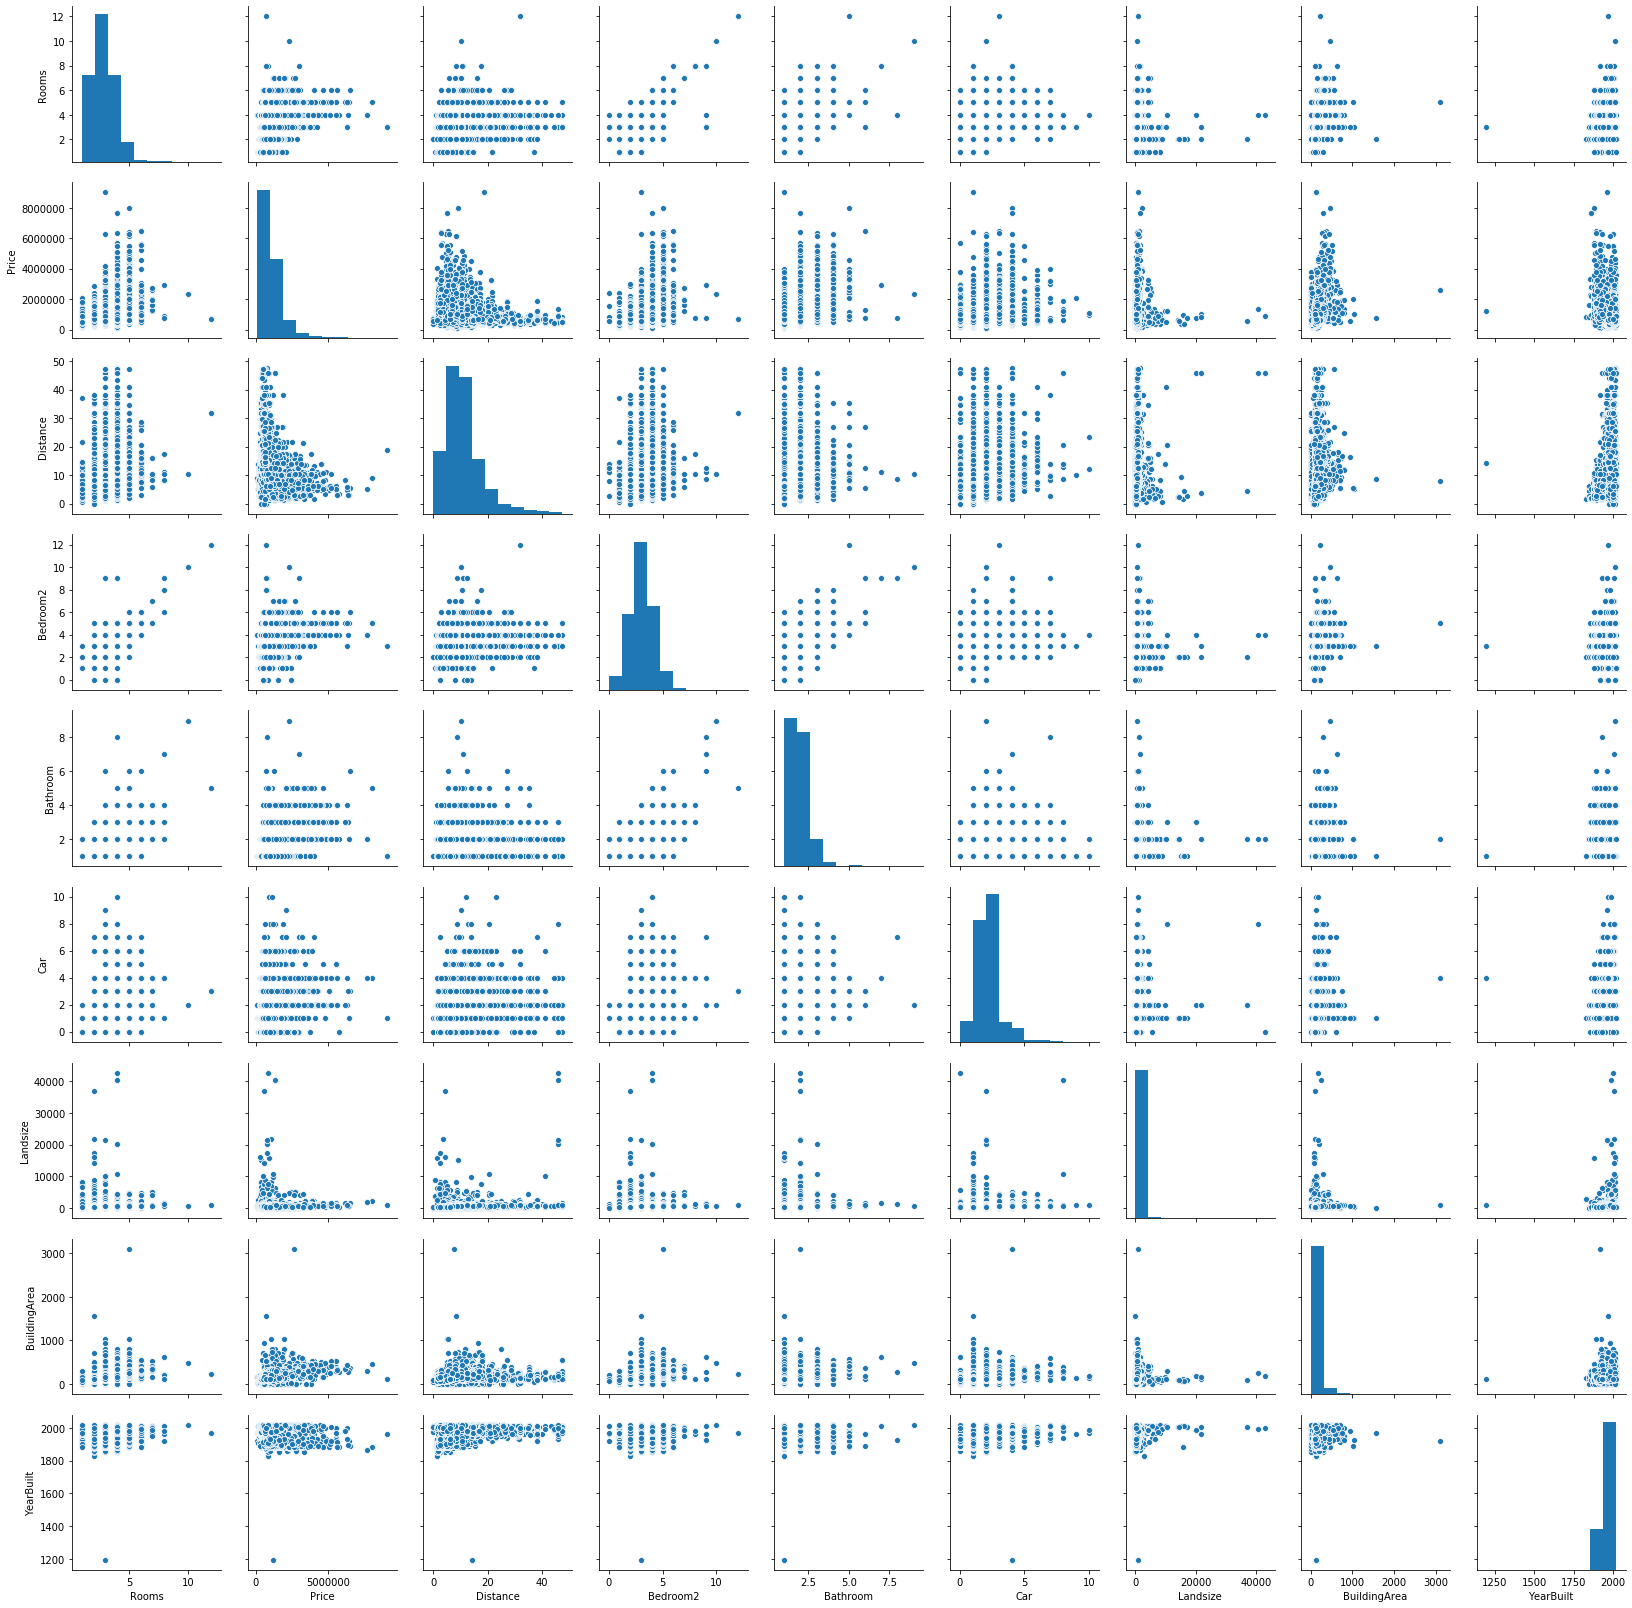

In [307]:
tempdata = data.dropna()
workdata = tempdata[["Rooms","Price","Distance","Bedroom2",
  "Bathroom","Car","Landsize","BuildingArea","YearBuilt"]]
sns.pairplot(workdata)


In [308]:
h = tempdata[tempdata['Type']=='h']
t = tempdata[tempdata['Type']=='t']
u = tempdata[tempdata['Type']=='u']

display(h.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
display(t.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
display(u.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000,6625.00000
mean,3.38868,1230542.19200,12.16361,3114.00423,3.36498,1.73328,1.83713,565.39547,166.83375,1958.74219,-37.79957,144.99105,7317.84966
std,0.84575,712328.25386,7.16051,123.29688,0.85422,0.74796,1.04339,881.95808,89.85348,37.59301,0.09660,0.13038,4335.27765
min,1.00000,131000.00000,1.30000,3002.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1196.00000,-38.17436,144.42379,249.00000
25%,3.00000,745500.00000,7.20000,3043.00000,3.00000,1.00000,1.00000,353.00000,115.00000,1930.00000,-37.85570,144.90930,4048.00000
50%,3.00000,1045000.00000,11.20000,3082.00000,3.00000,2.00000,2.00000,561.00000,147.00000,1960.00000,-37.79256,145.00010,6388.00000
75%,4.00000,1500000.00000,14.70000,3148.00000,4.00000,2.00000,2.00000,672.00000,196.00000,1988.00000,-37.73966,145.07470,10175.00000
max,12.00000,9000000.00000,47.40000,3977.00000,12.00000,9.00000,10.00000,42800.00000,3112.00000,2019.00000,-37.40720,145.52635,21650.00000


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000,722.00000
mean,2.86704,905321.23684,10.09598,3098.62604,2.84349,1.83380,1.55956,275.35734,135.60084,2000.48061,-37.81168,144.99188,7152.19668
std,0.68188,390857.67751,4.64780,79.03876,0.68399,0.62101,0.56227,704.67857,51.54769,19.92114,0.08086,0.08963,4177.22668
min,1.00000,310000.00000,1.30000,3002.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1860.00000,-38.12477,144.74042,389.00000
25%,2.00000,650000.00000,6.75000,3043.00000,2.00000,1.00000,1.00000,118.00000,107.00000,2000.00000,-37.87252,144.92239,4442.00000
50%,3.00000,825000.00000,10.10000,3073.00000,3.00000,2.00000,2.00000,194.00000,131.00000,2007.00000,-37.79581,144.99940,6512.50000
75%,3.00000,1050000.00000,13.00000,3148.75000,3.00000,2.00000,2.00000,293.00000,160.00000,2012.00000,-37.75163,145.05462,9205.00000
max,5.00000,3820000.00000,35.40000,3805.00000,5.00000,4.00000,4.00000,15900.00000,351.00000,2017.00000,-37.56810,145.32165,21650.00000


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000,1540.00000
mean,1.96104,588722.61104,7.57156,3107.70130,1.95455,1.18506,1.13117,459.49156,80.34802,1979.63377,-37.82234,144.99267,8307.81818
std,0.62004,238853.96083,4.41485,68.89920,0.62273,0.39511,0.49658,1697.83133,49.73754,26.13688,0.06058,0.06873,4538.62157
min,1.00000,170000.00000,0.00000,3000.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1830.00000,-38.16404,144.67070,534.00000
25%,2.00000,430000.00000,4.50000,3051.00000,2.00000,1.00000,1.00000,0.00000,60.00000,1966.75000,-37.86166,144.95192,5015.75000
50%,2.00000,545000.00000,6.90000,3121.00000,2.00000,1.00000,1.00000,0.00000,74.00000,1975.00000,-37.82265,144.99389,7570.00000
75%,2.00000,691000.00000,11.12500,3163.00000,2.00000,1.00000,1.00000,243.25000,92.00000,2004.00000,-37.78172,145.03420,10969.00000
max,6.00000,2460000.00000,41.00000,3910.00000,5.00000,3.00000,7.00000,37000.00000,1561.00000,2017.00000,-37.57063,145.26345,21650.00000


In [309]:
workdata = tempdata[["Rooms","Price","Distance"]]
scaler = StandardScaler()
scaler.fit(workdata)
workdata = scaler.transform(workdata)


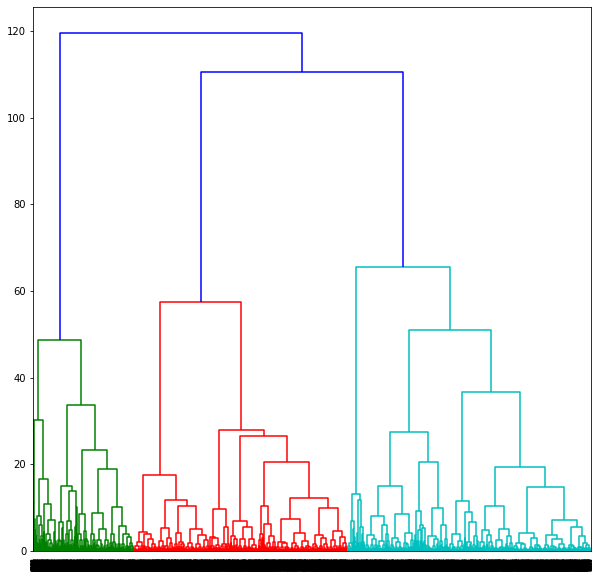

In [310]:
plt.figure(figsize=(10,10))
dendogram = sch.dendrogram(sch.linkage(workdata,method='ward'))

In [311]:
def score_to_numeric(x):
    if x=='h':
        return 2
    if x=='u':
        return 0
    if x=='t':
        return 1
tempdata['TypeInt'] = tempdata['Type'].apply(score_to_numeric)  

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [312]:
k = 3
Hcluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
Hcluster.fit(workdata)
sm.accuracy_score(tempdata['TypeInt'],Hcluster.labels_)

0.21908405536176437

In [313]:
Hcluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='complete')
Hcluster.fit(workdata)
sm.accuracy_score(tempdata['TypeInt'],Hcluster.labels_)

0.08225497918307641

In [314]:
Hcluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='average')
Hcluster.fit(workdata)
sm.accuracy_score(tempdata['TypeInt'],Hcluster.labels_)

0.7410824800270057

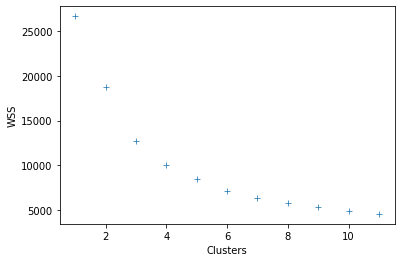

In [315]:
# Elbow Method
K=range(1,12)
wss = []

for k in K:
    kmeans= cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans = kmeans.fit(workdata)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker ="+" )


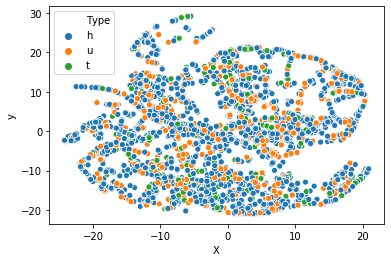

In [316]:
#TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3, random_state=0)
twoD = tsne.fit_transform(workdata)

df = pd.DataFrame()

df['X'] = twoD[:,0]
df['y'] = twoD[:,1]

df=df.merge(tempdata['Type'],left_index = True, right_index= True)
df=df.merge(tempdata['Suburb'],left_index = True, right_index= True)

sns.scatterplot(x='X', y="y",hue='Type' ,data=df)
plt.show()


In [317]:
df.groupby(['Suburb']).agg(['count'])

,X,y,Type
,count,count,count
Suburb,,,
Abbotsford,24,24,24
Airport West,25,25,25
Albert Park,23,23,23
Alphington,12,12,12
Altona,22,22,22
Altona North,17,17,17
Armadale,31,31,31
Ascot Vale,56,56,56


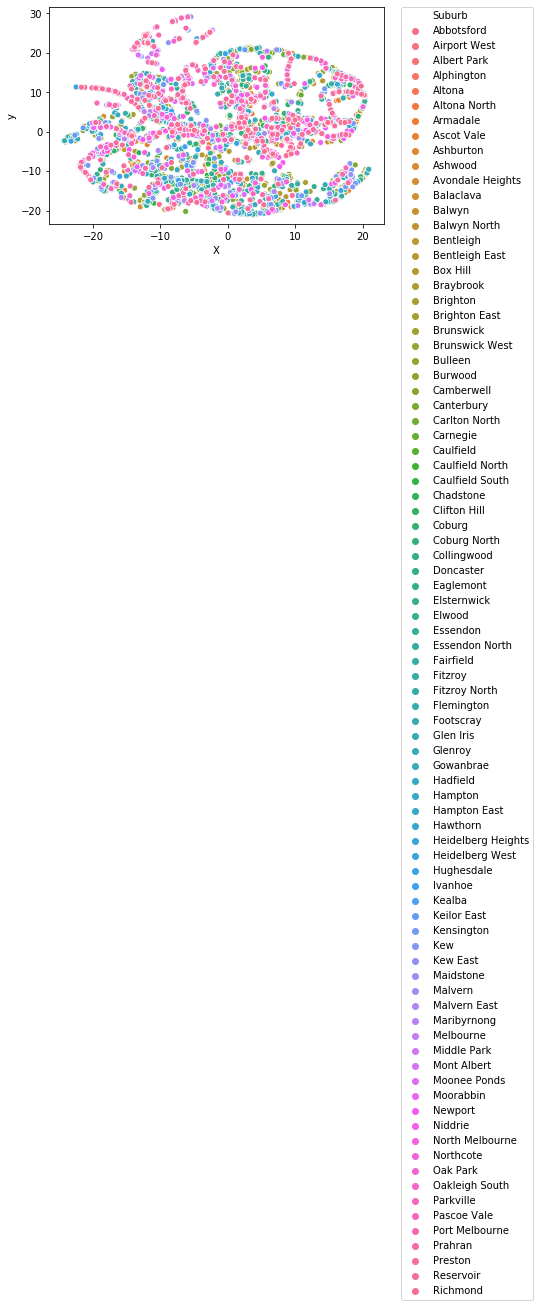

In [318]:
sns.scatterplot(x='X', y="y",hue='Suburb' ,data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [319]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
KMmodel = kmeans.fit(workdata)
KMmodel.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [320]:
sm.accuracy_score(tempdata['TypeInt'],KMmodel.labels_)

0.3979970743783054

In [321]:
cluster_pred = pd.DataFrame(KMmodel.labels_)
workdata = pd.DataFrame(workdata)
workdata.columns = ["Rooms","Price","Distance"]
workdata=workdata.merge(cluster_pred,left_index = True, right_index= True)

In [322]:
workdata=workdata.merge(tempdata['Type'],left_index = True, right_index= True)
workdata=workdata.merge(tempdata['Suburb'],left_index = True, right_index= True)
workdata.rename(columns = {0:'Pred'}, inplace = True)

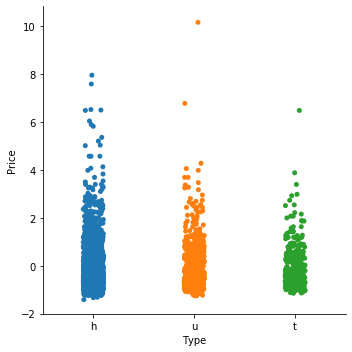

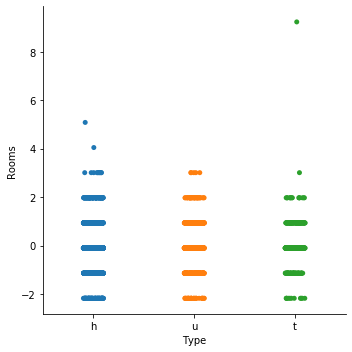

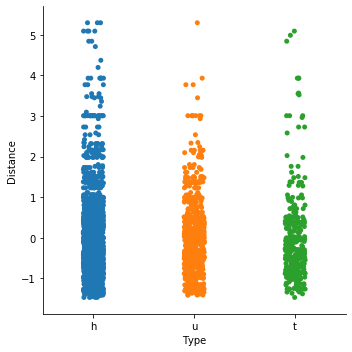

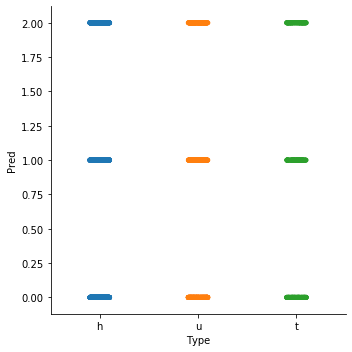

In [323]:
sns.catplot(x="Type", y= "Price", data =workdata)
sns.catplot(x="Type", y= "Rooms", data =workdata)
sns.catplot(x="Type", y= "Distance", data =workdata)
sns.catplot(x="Type", y= 'Pred', data =workdata)

In [324]:
# How many houses per house type
display(workdata['Type'].value_counts())
display(workdata['Pred'].value_counts())

h    1919
u     716
t     304
Name: Type, dtype: int64

0    1334
1     921
2     684
Name: Pred, dtype: int64

In [325]:
display(workdata[(workdata['Pred'] == 0) & (workdata['Type'] == 'u') ].agg(['count']))
display(workdata[(workdata['Pred'] == 2) & (workdata['Type'] == 'h') ].agg(['count']))
display(workdata[(workdata['Pred'] == 1) & (workdata['Type'] == 't') ].agg(['count']))

,Rooms,Price,Distance,Pred,Type,Suburb
count,329,329,329,329,329,329


,Rooms,Price,Distance,Pred,Type,Suburb
count,438,438,438,438,438,438


,Rooms,Price,Distance,Pred,Type,Suburb
count,93,93,93,93,93,93


In [326]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(workdata.groupby(['Suburb']).agg(['count']))

,Rooms,Price,Distance,Pred,Type
,count,count,count,count,count
Suburb,,,,,
Abbotsford,24,24,24,24,24
Airport West,25,25,25,25,25
Albert Park,23,23,23,23,23
Alphington,12,12,12,12,12
Altona,22,22,22,22,22
Altona North,17,17,17,17,17
Armadale,31,31,31,31,31
Ascot Vale,56,56,56,56,56


In [327]:
# How many house types per suburb
Suburb = workdata.groupby('Suburb')
workdata['Type'].value_counts()

h    1919
u     716
t     304
Name: Type, dtype: int64

In [328]:
df_suburb = workdata.groupby(['Type','Suburb'])['Price'].count().reset_index()
df_suburb.rename(columns = {'Price':'Count'}, inplace = True)
df_pred = workdata.groupby(['Type','Pred','Suburb'])['Price'].count().reset_index()
df_pred.rename(columns = {'Price':'Count'}, inplace = True)

In [329]:
df_suburb.sort_values(by=['Suburb'])

,Type,Suburb,Count
0,h,Abbotsford,21
155,u,Abbotsford,3
1,h,Airport West,15
84,t,Airport West,6
156,u,Airport West,4
2,h,Albert Park,22
157,u,Albert Park,1
3,h,Alphington,8
85,t,Alphington,1
158,u,Alphington,3


In [330]:
df_pred.sort_values(by=['Suburb'])

,Type,Pred,Suburb,Count
0,h,0,Abbotsford,10
83,h,1,Abbotsford,6
468,u,2,Abbotsford,1
418,u,1,Abbotsford,2
148,h,2,Abbotsford,5
276,t,1,Airport West,1
221,t,0,Airport West,4
469,u,2,Airport West,3
84,h,1,Airport West,1
1,h,0,Airport West,7


In [332]:
from scipy import stats
tempdata1 = tempdata[["Rooms","Price","Distance"]]
tempdata1 = tempdata1[(np.abs(stats.zscore(tempdata1)) < 3).all(axis=1)]

In [333]:
# Mean price, rooms, etc for clusters
h = tempdata1[tempdata1['Type']=='h']
t = tempdata1[tempdata1['Type']=='t']
u = tempdata1[tempdata1['Type']=='u']

display(h.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
display(t.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
display(u.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

KeyError: 'Type'